In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import cv2
import pickle
import tensorflow as tf
import tensorflow.keras.layers
from keras.models import Sequential
import seaborn as sns
import os
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

2022-09-07 10:07:08.073640: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-07 10:07:08.083110: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lepton/.pyenv/versions/3.8.12/envs/Anaemia_Classification/lib/python3.8/site-packages/cv2/../../lib64:
2022-09-07 10:07:08.083158: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:

path = "/home/lepton/code/vivekptl9/Anaemia_Classification/DD"
print(os.listdir(path))

SIZE = 512 #Resize images

train_images = []

for directory_path in glob.glob(path +"/Normal"):
    for img_path in glob.glob(os.path.join(directory_path, "*.tiff")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
        
train_images = np.array(train_images)


['Normal', 'masks']


In [3]:
train_images.shape

(112, 512, 512, 3)

In [4]:
# from skimage import io
# path2 = "/home/lepton/code/vivekptl9/Anaemia_Classification/sample_dataset/sample_mask/ground_truth/masks/"
# test_mask_png = io.imread(path2 + "healthy5.tif")
# plt.imshow(test_mask_png)
# print (np.unique(test_mask_png))

In [5]:
# my_mask = np.where (test_mask_png>0, 1, test_mask_png)
# print(np.unique(my_mask))
# plt.imshow(my_mask)
# cv2.imwrite(path+"masks/healthy5.tif",prediction_image)


In [6]:
train_masks = [] 
for directory_path in glob.glob(path+"/masks"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.tiff")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE, SIZE))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)
        
train_masks = np.array(train_masks)
train_masks.shape

(112, 512, 512)

In [7]:
X_train = train_images
y_train = train_masks
#print(y_train)
y_train = np.expand_dims(y_train, axis=3)
#print(y_train)


In [8]:
activation = 'sigmoid'
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
#feature_extractor.add(MaxPooling2D(pool_size=(2,2)))

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(MaxPooling2D(pool_size=(2,2)))

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
# #feature_extractor.add(BatchNormalization())
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(MaxPooling2D(pool_size=(2,2)))

#feature_extractor.add(BatchNormalization())
#feature_extractor.add(MaxPooling2D())
#feature_extractor.add(Flatten())

2022-09-07 10:07:30.735797: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-07 10:07:30.735944: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vivek-lepton): /proc/driver/nvidia/version does not exist
2022-09-07 10:07:30.738148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
X = feature_extractor.predict(X_train)
#print(X.shape)

X = X.reshape(-1, X.shape[3])
print(X.shape)
Y = y_train.reshape(-1)
Y.shape

4/4 [==============================] - 20s 5s/step
(29360128, 32)


(29360128,)

In [10]:
dataset = pd.DataFrame(X)
dataset['Label'] = Y
# print(dataset['Label'].unique())
# print(dataset['Label'].value_counts())
dataset.shape

(29360128, 33)

In [11]:
dataset = dataset[dataset['Label'] != 0]
X_for_RF = dataset.drop(labels = ['Label'], axis=1)
Y_for_RF = dataset['Label']


In [12]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Label
16787,0.413378,0.389705,0.659709,0.209153,0.412274,0.502695,0.722006,0.304935,0.597402,0.719163,...,0.225323,0.470632,0.603311,0.587622,0.551367,0.417593,0.298593,0.364637,0.453497,2
16788,0.413219,0.397022,0.661060,0.207183,0.415519,0.500396,0.725175,0.306401,0.596680,0.716593,...,0.229623,0.472306,0.603552,0.588386,0.555482,0.418744,0.299715,0.366490,0.455366,3
16789,0.410440,0.391881,0.660354,0.206318,0.419011,0.500640,0.726071,0.303904,0.599361,0.715421,...,0.228995,0.471145,0.600894,0.595215,0.556556,0.418389,0.293930,0.365544,0.457120,3
17293,0.404816,0.414858,0.667355,0.213659,0.405513,0.488583,0.723725,0.304584,0.611383,0.713209,...,0.214432,0.464005,0.596141,0.593002,0.561367,0.415636,0.294439,0.354053,0.441344,3
17294,0.408898,0.402934,0.670386,0.208220,0.405525,0.496845,0.729594,0.295181,0.615642,0.711023,...,0.213657,0.469961,0.605026,0.591747,0.570918,0.421111,0.297075,0.358456,0.437966,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29291362,0.407093,0.374783,0.659262,0.198084,0.430892,0.497212,0.723438,0.301191,0.602668,0.716435,...,0.226571,0.463941,0.601739,0.591907,0.548491,0.421260,0.286446,0.362002,0.463996,1
29291363,0.407502,0.375198,0.655828,0.200027,0.428469,0.499084,0.723944,0.301990,0.597881,0.717313,...,0.229918,0.465883,0.599621,0.587509,0.548837,0.425528,0.291659,0.366937,0.462907,1
29291364,0.411545,0.381170,0.658758,0.200327,0.428480,0.500872,0.721395,0.299408,0.600756,0.716521,...,0.228343,0.465198,0.596567,0.589744,0.546997,0.420621,0.290753,0.365581,0.461599,1
29291365,0.414318,0.381410,0.657736,0.200371,0.426525,0.499154,0.722014,0.301730,0.602419,0.714691,...,0.223332,0.463374,0.600493,0.588179,0.549123,0.416439,0.288843,0.363610,0.459508,1


In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [14]:
model.fit(X_for_RF, Y_for_RF) #For sklearn no one hot encoding


# filename = 'RF_model.sav'
# pickle.dump(model, open(filename, 'wb'))

# loaded_model = pickle.load(open(filename, 'rb'))

RandomForestClassifier(n_estimators=50, random_state=42)

1/1 [==============================] - 0s 235ms/step


(512, 512, 3)

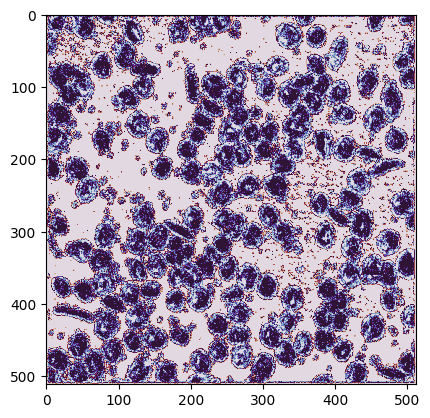

In [15]:
test_img = cv2.imread('/home/lepton/Desktop/anaemia/Anaemia.png', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE, SIZE))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

#predict_image = np.expand_dims(X_train[8,:,:,:], axis=0)
X_test_feature = feature_extractor.predict(test_img)
X_test_feature = X_test_feature.reshape(-1, X_test_feature.shape[3])

prediction = model.predict(X_test_feature)

prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image,cmap="twilight")
img.shape

In [16]:
# cv2.imwrite("/home/lepton/Desktop/Anemia_rescaled.tiff",prediction_image)
# sns.imshow(prediction_image)

In [17]:
from PIL import Image as im
prediction_image = np.reshape(prediction_image,(SIZE,SIZE))
data = im.fromarray(prediction_image)
data.save("/home/lepton/Desktop/Anemia_rescaled.png")